In [1]:
# Load Libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


In [3]:
# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = read_csv(url, names=names)
print(dataset.shape)


(150, 5)


In [4]:
# Locating dataset variables
duplicates = dataset.duplicated()
print(duplicates.any())
print(dataset[duplicates])


True
     sepal-length  sepal-width  petal-length  petal-width           class
34            4.9          3.1           1.5          0.1     Iris-setosa
37            4.9          3.1           1.5          0.1     Iris-setosa
142           5.8          2.7           5.1          1.9  Iris-virginica


In [6]:
print(dataset.shape)
dataset.drop_duplicates(inplace = True)
print(dataset.shape)
print("S2-Nikhil_Chauhan")

(147, 5)
(147, 5)
S2-Nikhil_Chauhan


In [9]:
array = dataset.values
x = array[:, 0:4]
y = array[:, 4]
x_train, x_validation, y_train, y_validation = train_test_split(
    x, y, test_size=0.20, random_state=1)
models = []
models.append(('LR', LogisticRegression(
    solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
print("S2-Nikhil_Chauhan")
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

# Evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(
        model, x_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))


S2-Nikhil_Chauhan
LR: 0.948485 (0.077094)
LDA: 0.974242 (0.039394)
KNN: 0.965152 (0.042748)
CART: 0.939394 (0.056894)
NB: 0.949242 (0.067083)
SVM: 0.964394 (0.059656)


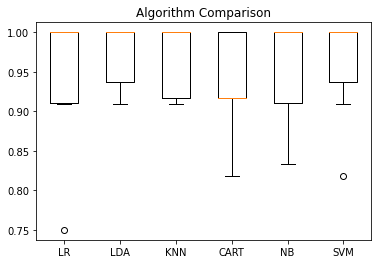

In [10]:
pyplot.boxplot(results , labels = names)
pyplot.title('Algorithm Comparison')
pyplot.show()
